In [14]:
import pandas as pd

# === Load file ===
df = pd.read_csv("../data/processed/apple_revenue_tags.csv")

# --- 1️⃣ Parse and sort by date ---
df['end'] = pd.to_datetime(df['end'], errors='coerce')
df = df.dropna(subset=['end']).sort_values('end')

# --- 2️⃣ Add Year, Month, Month_Name ---
df['Year'] = df['end'].dt.year
df['Month'] = df['end'].dt.month
df['Month_Name'] = df['end'].dt.strftime('%b')

# --- 3️⃣ Drop duplicate Year–Month combinations (keep latest) ---
df = df.drop_duplicates(subset=['Year', 'Month'], keep='last').reset_index(drop=True)

# --- 4️⃣ Convert all numeric columns to millions (except date parts) ---
value_cols = [c for c in df.columns if c not in ['end', 'Year', 'Month', 'Month_Name']]
df[value_cols] = df[value_cols].apply(pd.to_numeric, errors='coerce') / 1_000_000

# --- 5️⃣ Display summary and preview ---
print(f"✅ Cleaned Revenue Data (all columns kept, in-memory only)")
print(f"📊 Rows: {len(df)} | Columns: {len(df.columns)} | Date range: {df['end'].min().date()} → {df['end'].max().date()}")
display(df.head(10))

✅ Cleaned Revenue Data (all columns kept, in-memory only)
📊 Rows: 70 | Columns: 12 | Date range: 2007-09-29 → 2025-06-28


,end,RevenueFromContractWithCustomerExcludingAssessedTax,Revenues,SalesRevenueNet,SalesRevenueServicesGross,ContractWithCustomerLiabilityRevenueRecognized,DeferredRevenueCurrent,DeferredRevenueNoncurrent,IncreaseDecreaseInDeferredRevenue,Year,Month,Month_Name
0,2007-09-29,NaN,NaN,24578.0,NaN,NaN,NaN,NaN,566.0,2007,9,Sep
1,2008-06-28,NaN,NaN,7464.0,NaN,NaN,NaN,NaN,1823.0,2008,6,Jun
2,2008-09-27,NaN,NaN,37491.0,NaN,NaN,1617.0,3029.0,5642.0,2008,9,Sep
3,2008-12-27,NaN,NaN,11880.0,NaN,NaN,NaN,NaN,200.0,2008,12,Dec
4,2009-03-28,NaN,NaN,9084.0,NaN,NaN,NaN,NaN,128.0,2009,3,Mar
5,2009-06-27,NaN,NaN,9734.0,NaN,NaN,8469.0,3667.0,4254.0,2009,6,Jun
6,2009-09-26,NaN,NaN,12207.0,NaN,NaN,2053.0,853.0,521.0,2009,9,Sep
7,2009-12-26,NaN,NaN,15683.0,NaN,NaN,2590.0,922.0,606.0,2009,12,Dec
8,2010-03-27,NaN,NaN,13499.0,NaN,NaN,2542.0,941.0,577.0,2010,3,Mar
9,2010-06-26,NaN,NaN,15700.0,NaN,NaN,2691.0,1021.0,806.0,2010,6,Jun


🔍 Missing values per column:

SalesRevenueServicesGross                              69
Revenues                                               61
RevenueFromContractWithCustomerExcludingAssessedTax    38
ContractWithCustomerLiabilityRevenueRecognized         38
DeferredRevenueCurrent                                 31
DeferredRevenueNoncurrent                              31
SalesRevenueNet                                        28
IncreaseDecreaseInDeferredRevenue                      27
dtype: int64


/var/folders/x5/9y2gwd354cdc4c88h2mt60s80000gn/T/ipykernel_54798/2975955974.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing.index, y=missing.values, palette="crest")


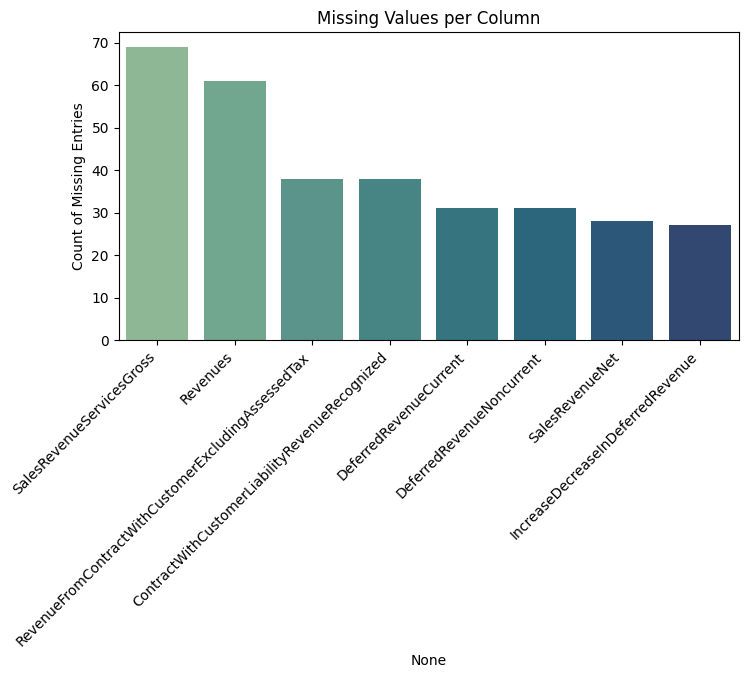


📊 Percentage of Missing Values:
RevenueFromContractWithCustomerExcludingAssessedTax    54.3
Revenues                                               87.1
SalesRevenueNet                                        40.0
SalesRevenueServicesGross                              98.6
ContractWithCustomerLiabilityRevenueRecognized         54.3
DeferredRevenueCurrent                                 44.3
DeferredRevenueNoncurrent                              44.3
IncreaseDecreaseInDeferredRevenue                      38.6
dtype: float64


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1️⃣ Count missing values per column ---
missing = df.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]

if len(missing) == 0:
    print("✅ No missing values found!")
else:
    print("🔍 Missing values per column:\n")
    print(missing)
    
    # --- 2️⃣ Visualize ---
    plt.figure(figsize=(8, 4))
    sns.barplot(x=missing.index, y=missing.values, palette="crest")
    plt.title("Missing Values per Column")
    plt.ylabel("Count of Missing Entries")
    plt.xticks(rotation=45, ha='right')
    plt.show()

# --- 3️⃣ Check total % missing ---
total_missing_pct = df.isna().mean().round(3) * 100
print("\n📊 Percentage of Missing Values:")
print(total_missing_pct[total_missing_pct > 0])

In [16]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


/var/folders/x5/9y2gwd354cdc4c88h2mt60s80000gn/T/ipykernel_54798/1421279933.py:42: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/santhosh/Desktop/fin analyst project/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


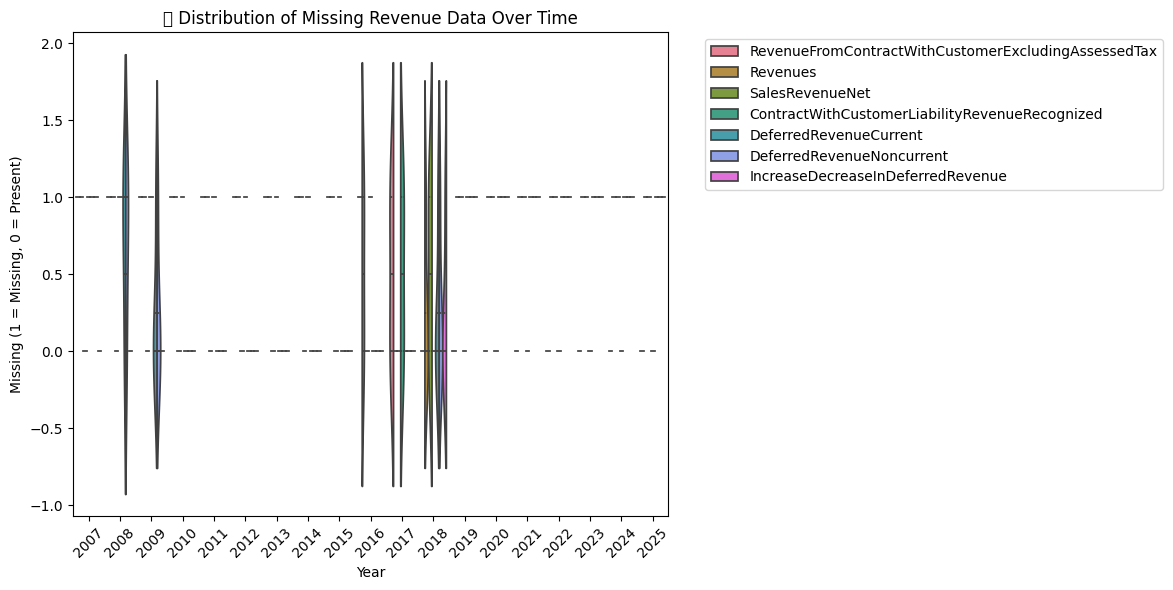

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

rev_cols = [
    "RevenueFromContractWithCustomerExcludingAssessedTax",
    "Revenues",
    "SalesRevenueNet",
    "ContractWithCustomerLiabilityRevenueRecognized",
    "DeferredRevenueCurrent",
    "DeferredRevenueNoncurrent",
    "IncreaseDecreaseInDeferredRevenue"
]

# Melt to long form
missing_long = df.melt(
    id_vars=["Year"],
    value_vars=rev_cols,
    var_name="Tag",
    value_name="Value"
)

# Encode missing (1=missing, 0=present)
missing_long["Missing"] = missing_long["Value"].isna().astype(int)

# Plot
plt.figure(figsize=(12, 6))
sns.violinplot(
    data=missing_long,
    x="Year",
    y="Missing",
    hue="Tag",
    split=True,
    inner="quart",
    palette="husl"
)

plt.title("📉 Distribution of Missing Revenue Data Over Time")
plt.xlabel("Year")
plt.ylabel("Missing (1 = Missing, 0 = Present)")
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [18]:
df

,end,RevenueFromContractWithCustomerExcludingAssessedTax,Revenues,SalesRevenueNet,SalesRevenueServicesGross,ContractWithCustomerLiabilityRevenueRecognized,DeferredRevenueCurrent,DeferredRevenueNoncurrent,IncreaseDecreaseInDeferredRevenue,Year,Month,Month_Name
0,2007-09-29,NaN,NaN,24578.0,NaN,NaN,NaN,NaN,566.0,2007,9,Sep
1,2008-06-28,NaN,NaN,7464.0,NaN,NaN,NaN,NaN,1823.0,2008,6,Jun
2,2008-09-27,NaN,NaN,37491.0,NaN,NaN,1617.0,3029.0,5642.0,2008,9,Sep
3,2008-12-27,NaN,NaN,11880.0,NaN,NaN,NaN,NaN,200.0,2008,12,Dec
4,2009-03-28,NaN,NaN,9084.0,NaN,NaN,NaN,NaN,128.0,2009,3,Mar
...,...,...,...,...,...,...,...,...,...,...,...,...
65,2024-06-29,85777.0,NaN,NaN,NaN,6541.0,NaN,NaN,NaN,2024,6,Jun
66,2024-09-28,391035.0,NaN,NaN,NaN,7700.0,NaN,NaN,NaN,2024,9,Sep
67,2024-12-28,124300.0,NaN,NaN,NaN,3700.0,NaN,NaN,NaN,2024,12,Dec
68,2025-03-29,95359.0,NaN,NaN,NaN,3672.0,NaN,NaN,NaN,2025,3,Mar


In [19]:
# Check which of our expected columns actually exist
rev_cols = [
    "RevenueFromContractWithCustomerExcludingAssessedTax",
    "Revenues",
    "SalesRevenueNet",
    "ContractWithCustomerLiabilityRevenueRecognized",
    "DeferredRevenueCurrent",
    "DeferredRevenueNoncurrent",
    "IncreaseDecreaseInDeferredRevenue"
]

print("Available columns in df:\n", df.columns.tolist())
print("\nExpected revenue cols:\n", rev_cols)

missing = [c for c in rev_cols if c not in df.columns]
print(f"\n❌ Missing from DataFrame: {missing}")

Available columns in df:
 ['end', 'RevenueFromContractWithCustomerExcludingAssessedTax', 'Revenues', 'SalesRevenueNet', 'SalesRevenueServicesGross', 'ContractWithCustomerLiabilityRevenueRecognized', 'DeferredRevenueCurrent', 'DeferredRevenueNoncurrent', 'IncreaseDecreaseInDeferredRevenue', 'Year', 'Month', 'Month_Name']

Expected revenue cols:
 ['RevenueFromContractWithCustomerExcludingAssessedTax', 'Revenues', 'SalesRevenueNet', 'ContractWithCustomerLiabilityRevenueRecognized', 'DeferredRevenueCurrent', 'DeferredRevenueNoncurrent', 'IncreaseDecreaseInDeferredRevenue']

❌ Missing from DataFrame: []


/var/folders/x5/9y2gwd354cdc4c88h2mt60s80000gn/T/ipykernel_54798/3015899293.py:38: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/santhosh/Desktop/fin analyst project/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


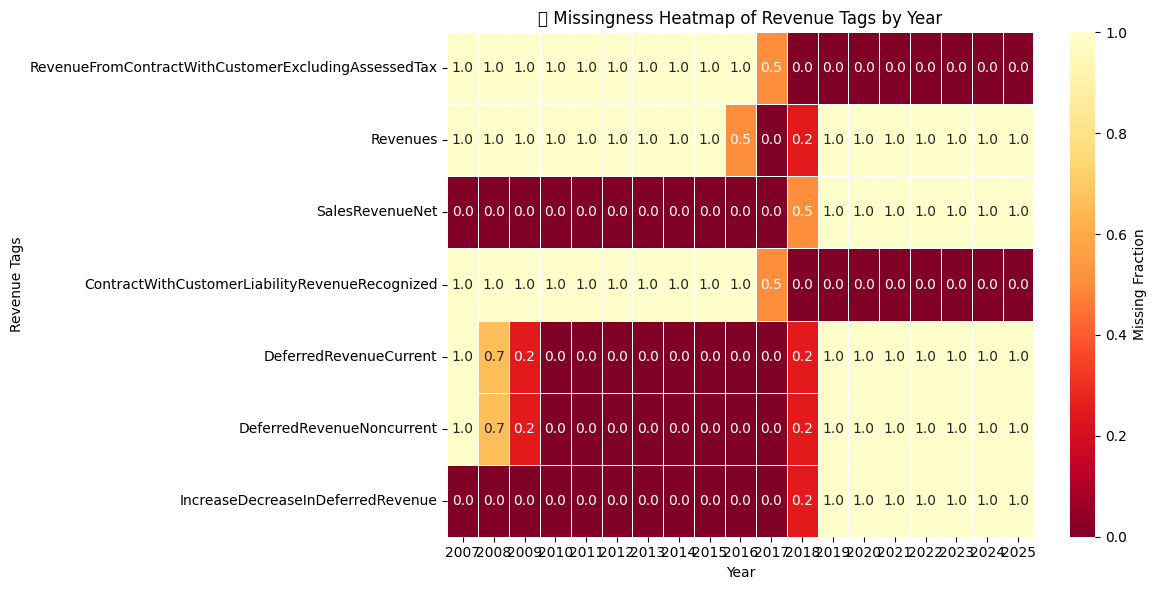

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Only the revenue-related tags
rev_cols = [
    "RevenueFromContractWithCustomerExcludingAssessedTax",
    "Revenues",
    "SalesRevenueNet",
    "ContractWithCustomerLiabilityRevenueRecognized",
    "DeferredRevenueCurrent",
    "DeferredRevenueNoncurrent",
    "IncreaseDecreaseInDeferredRevenue"
]

# Create binary missing indicator
missing_matrix = df[["Year"] + rev_cols].copy()
missing_matrix.set_index("Year", inplace=True)
missing_matrix = missing_matrix.isna().astype(int)

# Aggregate by year (mean = fraction of missing values in that year)
yearly_missing = missing_matrix.groupby(missing_matrix.index).mean().T

# --- Heatmap ---
plt.figure(figsize=(12, 6))
sns.heatmap(
    yearly_missing,
    cmap="YlOrRd_r",
    cbar_kws={'label': 'Missing Fraction'},
    linewidths=0.5,
    annot=True,
    fmt=".1f"
)

plt.title("📆 Missingness Heatmap of Revenue Tags by Year")
plt.xlabel("Year")
plt.ylabel("Revenue Tags")
plt.tight_layout()
plt.show()

/var/folders/x5/9y2gwd354cdc4c88h2mt60s80000gn/T/ipykernel_54798/3036200668.py:21: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/Users/santhosh/Desktop/fin analyst project/venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 128198 (\N{TEAR-OFF CALENDAR}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


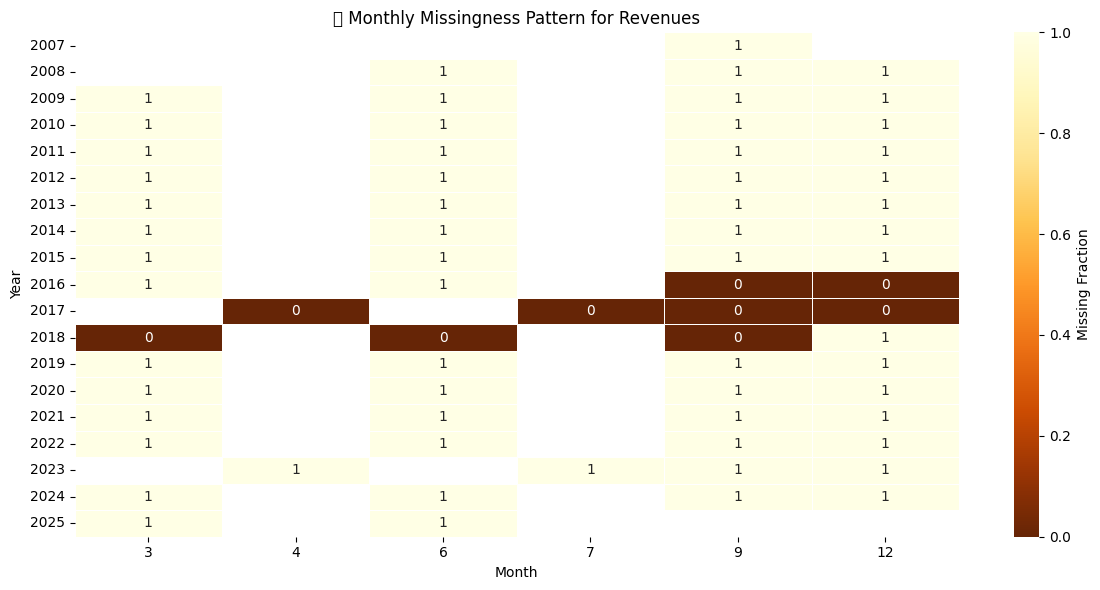

In [21]:
# Aggregate missing values by year and month
monthly_missing = (
    df.set_index(["Year", "Month"])[rev_cols]
    .isna()
    .astype(int)
    .groupby(["Year", "Month"])
    .mean()
    .reset_index()
)

# Pivot for heatmap
pivot = monthly_missing.pivot_table(
    index="Year", columns="Month", values="Revenues", aggfunc="mean"
)

plt.figure(figsize=(12, 6))
sns.heatmap(pivot, cmap="YlOrBr_r", cbar_kws={'label': 'Missing Fraction'}, linewidths=0.5, annot=True)
plt.title("📆 Monthly Missingness Pattern for Revenues")
plt.xlabel("Month")
plt.ylabel("Year")
plt.tight_layout()
plt.show()

In [22]:
def select_revenue(row):
    if row['Year'] <= 2015:
        return row['SalesRevenueNet'] or row['Revenues']
    elif 2016 <= row['Year'] <= 2020:
        return row['RevenueFromContractWithCustomerExcludingAssessedTax']
    else:
        return row['SalesRevenueNet'] or row['RevenueFromContractWithCustomerExcludingAssessedTax'] or row['Revenues']

df['Revenue_Final'] = df.apply(select_revenue, axis=1)

In [23]:
revenue_clean = df[['end', 'Year', 'Month', 'Revenue_Final']].dropna(subset=['Revenue_Final'])
merged_df = pd.merge(merged_df, revenue_clean, on='end', how='left')

print("✅ Smart revenue merge complete")
print(f"Rows with revenue: {revenue_clean.shape[0]}")

NameError: name 'merged_df' is not defined

In [24]:
import pandas as pd

# Load your main Apple financials CSV
merged_df = pd.read_csv("../data/processed/apple_selected_financials.csv")

# Make sure the date column matches the same format as revenue data
merged_df['end'] = pd.to_datetime(merged_df['end'])

In [25]:
revenue_clean = df[['end', 'Year', 'Month', 'Revenue_Final']].dropna(subset=['Revenue_Final'])
merged_df = pd.merge(merged_df, revenue_clean, on='end', how='left')

print("✅ Smart revenue merge complete")
print(f"Rows with revenue: {revenue_clean.shape[0]}")
print(f"Final merged dataset shape: {merged_df.shape}")

✅ Smart revenue merge complete
Rows with revenue: 46
Final merged dataset shape: (71, 29)


In [26]:
merged_df[['end', 'Revenue_Final']].tail(10)

,end,Revenue_Final
61,2023-04-01,NaN
62,2023-07-01,NaN
63,2023-09-30,NaN
64,2023-12-30,NaN
65,2024-03-30,NaN
66,2024-06-29,NaN
67,2024-09-28,NaN
68,2024-12-28,NaN
69,2025-03-29,NaN
70,2025-06-28,NaN


In [27]:
coverage = merged_df['Revenue_Final'].notna().mean() * 100
print(f"📊 Revenue coverage: {coverage:.2f}% of all reporting periods")

📊 Revenue coverage: 64.79% of all reporting periods


In [28]:
missing_periods = merged_df[merged_df['Revenue_Final'].isna()][['end']]
print("🕳 Missing revenue periods:")
print(missing_periods.head(10))

🕳 Missing revenue periods:
          end
0  2006-09-30
33 2016-03-26
34 2016-06-25
35 2016-09-24
36 2016-12-31
37 2017-04-01
38 2017-07-01
53 2021-03-27
54 2021-06-26
55 2021-09-25


In [29]:
merged_df['Revenue_Final'] = (
    merged_df['Revenue_Final']
    .interpolate(method='linear', limit_direction='both')
)

In [30]:
merged_df

,end,Assets,AssetsCurrent,AssetsNoncurrent,CashAndCashEquivalentsAtCarryingValue,EarningsPerShareBasic,EarningsPerShareDiluted,GrossProfit,IncomeLossFromContinuingOperationsBeforeIncomeTaxesExtraordinaryItemsNoncontrollingInterest,IncomeTaxExpenseBenefit,...,ResearchAndDevelopmentExpense,RevenueFromContractWithCustomerExcludingAssessedTax,Revenues,SalesRevenueNet,StockholdersEquity,WeightedAverageNumberOfDilutedSharesOutstanding,WeightedAverageNumberOfSharesOutstandingBasic,Year,Month,Revenue_Final
0,2006-09-30,NaN,NaN,NaN,6.392000e+09,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,9.984000e+09,NaN,NaN,NaN,NaN,24578.0
1,2007-09-29,NaN,NaN,NaN,9.352000e+09,4.04,3.93,8.152000e+09,NaN,1.511000e+09,...,7.820000e+08,NaN,NaN,2.457800e+10,1.453100e+10,8.892920e+08,8.645950e+08,2007.0,9.0,24578.0
2,2008-06-28,NaN,NaN,NaN,9.373000e+09,1.21,1.19,2.600000e+09,NaN,1.615000e+09,...,8.110000e+08,NaN,NaN,7.464000e+09,NaN,9.010280e+08,8.837380e+08,2008.0,6.0,7464.0
3,2008-09-27,3.617100e+10,3.231100e+10,NaN,1.187500e+10,5.48,6.78,1.319700e+10,NaN,2.061000e+09,...,1.109000e+09,NaN,NaN,3.247900e+10,2.229700e+10,9.021390e+08,8.815920e+08,2008.0,9.0,37491.0
4,2008-12-27,NaN,NaN,NaN,7.236000e+09,2.54,2.50,4.507000e+09,NaN,1.004000e+09,...,3.150000e+08,NaN,NaN,1.188000e+10,NaN,9.014940e+08,8.891420e+08,2008.0,12.0,11880.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,2024-06-29,3.316120e+11,1.254350e+11,2.061770e+11,2.556500e+10,1.40,5.11,3.967800e+10,9.387500e+10,1.487500e+10,...,2.360500e+10,8.577700e+10,NaN,NaN,6.670800e+10,1.546318e+10,1.540105e+10,NaN,NaN,111439.0
67,2024-09-28,3.649800e+11,1.529870e+11,2.119930e+11,2.994300e+10,6.11,6.08,1.806830e+11,1.234850e+11,2.974900e+10,...,3.137000e+10,3.910350e+11,NaN,NaN,5.695000e+10,1.540810e+10,1.534378e+10,NaN,NaN,111439.0
68,2024-12-28,3.440850e+11,1.332400e+11,2.108450e+11,3.029900e+10,2.41,2.40,5.827500e+10,4.258400e+10,6.254000e+09,...,8.268000e+09,1.243000e+11,NaN,NaN,6.675800e+10,1.515086e+10,1.508172e+10,NaN,NaN,111439.0
69,2025-03-29,3.312330e+11,1.186740e+11,2.125590e+11,2.816200e+10,1.65,4.05,1.031420e+11,2.931000e+10,1.078400e+10,...,8.550000e+09,9.535900e+10,NaN,NaN,6.679600e+10,1.505613e+10,1.503790e+10,NaN,NaN,111439.0


📈 Correlation of Revenue_Final with other financial metrics:

                                                 Revenue_Final
Revenue_Final                                         1.000000
AssetsCurrent                                         0.656874
Year                                                  0.651648
Assets                                                0.647526
Liabilities                                           0.631432
WeightedAverageNumberOfDilutedSharesOutstanding       0.608888
LiabilitiesCurrent                                    0.570729
NetCashProvidedByUsedInOperatingActivities            0.561479
ResearchAndDevelopmentExpense                         0.541573
OperatingExpenses                                     0.540045


/var/folders/x5/9y2gwd354cdc4c88h2mt60s80000gn/T/ipykernel_54798/629547374.py:15: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


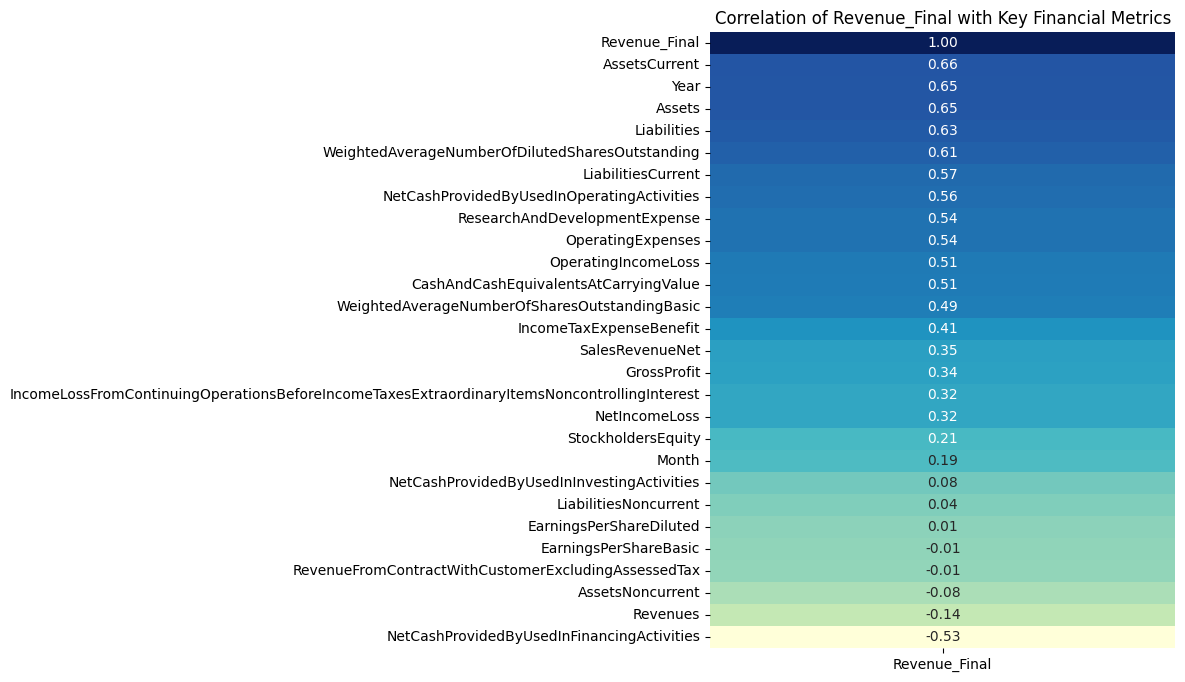

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Correlation analysis for Revenue_Final ---
corr_df = merged_df.corr(numeric_only=True)[['Revenue_Final']].sort_values('Revenue_Final', ascending=False)

print("📈 Correlation of Revenue_Final with other financial metrics:\n")
print(corr_df.head(10))

# --- 2. Visualize correlation heatmap ---
plt.figure(figsize=(6,8))
sns.heatmap(corr_df, annot=True, cmap="YlGnBu", fmt=".2f", cbar=False)
plt.title("Correlation of Revenue_Final with Key Financial Metrics", fontsize=12)
plt.tight_layout()
plt.show()

In [32]:
import numpy as np
from sklearn.preprocessing import RobustScaler

# Select only numeric columns
num_cols = merged_df.select_dtypes(include=[np.number]).columns.tolist()

# Drop very sparse columns (over 70% missing)
num_cols = [col for col in num_cols if merged_df[col].isna().mean() < 0.7]

df_num = merged_df[num_cols].copy()

print(f"✅ Numeric columns considered: {len(df_num.columns)}")

✅ Numeric columns considered: 27


In [33]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [34]:
# Fill missing values with column medians
df_num_filled = df_num.fillna(df_num.median())

# Robust scaling (handles outliers gracefully)
scaler = RobustScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_num_filled), columns=df_num.columns)

print("✅ Scaling complete — outliers minimized, all on comparable scale")

✅ Scaling complete — outliers minimized, all on comparable scale


/var/folders/x5/9y2gwd354cdc4c88h2mt60s80000gn/T/ipykernel_54798/349322013.py:6: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


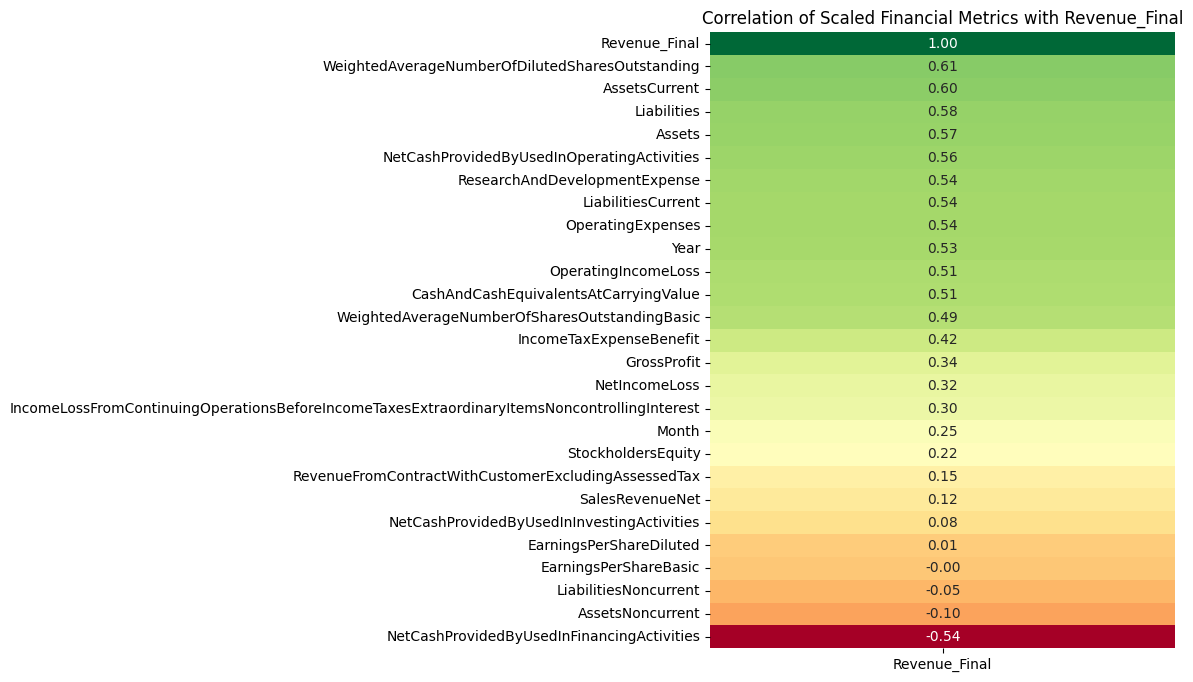


Top correlated metrics with Revenue_Final (scaled):
Revenue_Final                                      1.000000
WeightedAverageNumberOfDilutedSharesOutstanding    0.608800
AssetsCurrent                                      0.600707
Liabilities                                        0.575104
Assets                                             0.568171
NetCashProvidedByUsedInOperatingActivities         0.558144
ResearchAndDevelopmentExpense                      0.541905
LiabilitiesCurrent                                 0.541726
OperatingExpenses                                  0.540735
Year                                               0.531513
Name: Revenue_Final, dtype: float64


In [35]:
corr_scaled = df_scaled.corr(numeric_only=True)['Revenue_Final'].sort_values(ascending=False)

plt.figure(figsize=(6,8))
sns.heatmap(corr_scaled.to_frame(), annot=True, fmt=".2f", cmap="RdYlGn", cbar=False)
plt.title("Correlation of Scaled Financial Metrics with Revenue_Final", fontsize=12)
plt.tight_layout()
plt.show()

print("\nTop correlated metrics with Revenue_Final (scaled):")
print(corr_scaled.head(10))

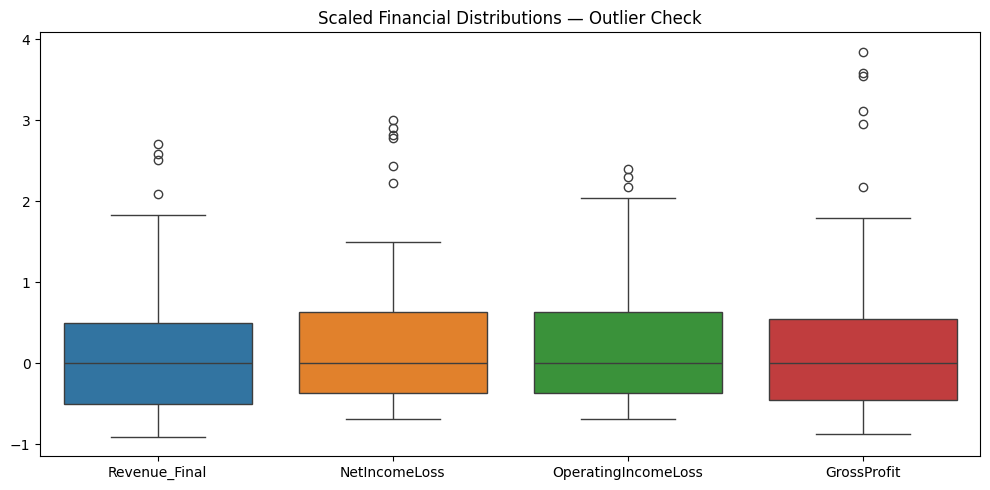

In [36]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df_scaled[['Revenue_Final', 'NetIncomeLoss', 'OperatingIncomeLoss', 'GrossProfit']])
plt.title("Scaled Financial Distributions — Outlier Check")
plt.tight_layout()
plt.show()

In [37]:
# Ensure both columns exist
rev_cols = [col for col in merged_df.columns if 'Revenue' in col]
print("Revenue-related columns found:", rev_cols)

# Compute summary comparison
compare_rev = merged_df[rev_cols].describe().T[['mean', 'std', 'min', 'max']]
compare_rev['range'] = compare_rev['max'] - compare_rev['min']
print("\n📊 Revenue Comparison (Original vs Final):")
print(compare_rev)

Revenue-related columns found: ['RevenueFromContractWithCustomerExcludingAssessedTax', 'Revenues', 'SalesRevenueNet', 'Revenue_Final']

📊 Revenue Comparison (Original vs Final):
                                                            mean  \
RevenueFromContractWithCustomerExcludingAssesse...  1.672549e+11   
Revenues                                            7.894089e+10   
SalesRevenueNet                                     7.232443e+10   
Revenue_Final                                       8.551813e+04   

                                                             std  \
RevenueFromContractWithCustomerExcludingAssesse...  1.083883e+11   
Revenues                                            5.303945e+10   
SalesRevenueNet                                     5.721631e+10   
Revenue_Final                                       6.402473e+04   

                                                             min  \
RevenueFromContractWithCustomerExcludingAssesse...  5.380900e+10   
Reve

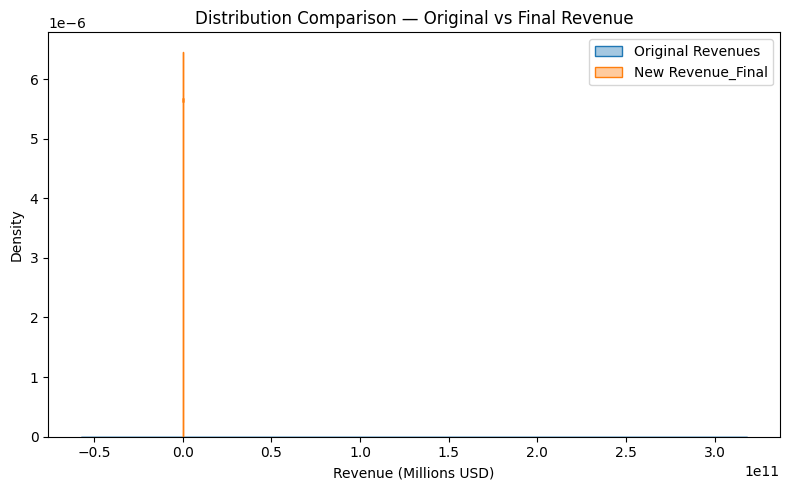

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.kdeplot(merged_df['Revenues'], label='Original Revenues', fill=True, alpha=0.4)
sns.kdeplot(merged_df['Revenue_Final'], label='New Revenue_Final', fill=True, alpha=0.4)
plt.title("Distribution Comparison — Original vs Final Revenue")
plt.xlabel("Revenue (Millions USD)")
plt.legend()
plt.tight_layout()
plt.show()

In [39]:
corr_check = merged_df[['Revenues', 'Revenue_Final']].corr().iloc[0,1]
print(f"🔗 Correlation between Original and Final Revenue: {corr_check:.3f}")

🔗 Correlation between Original and Final Revenue: -0.140


In [40]:
rev_compare = merged_df[['SalesRevenueNet', 'Revenues', 'Revenue_Final']].describe().T
rev_compare['range'] = rev_compare['max'] - rev_compare['min']
print("📊 Summary Comparison — SalesRevenueNet vs Revenues vs Revenue_Final:")
display(rev_compare[['mean', 'std', 'min', 'max', 'range']])

📊 Summary Comparison — SalesRevenueNet vs Revenues vs Revenue_Final:


,mean,std,min,max,range
SalesRevenueNet,7.232443e+10,5.721631e+10,7.464000e+09,2.156390e+11,2.081750e+11
Revenues,7.894089e+10,5.303945e+10,4.540800e+10,2.156390e+11,1.702310e+11
Revenue_Final,8.551813e+04,6.402473e+04,7.464000e+03,2.745150e+05,2.670510e+05


🔗 Correlation Matrix:


,SalesRevenueNet,Revenues,Revenue_Final
SalesRevenueNet,1.000000,0.441358,0.351990
Revenues,0.441358,1.000000,-0.139588
Revenue_Final,0.351990,-0.139588,1.000000


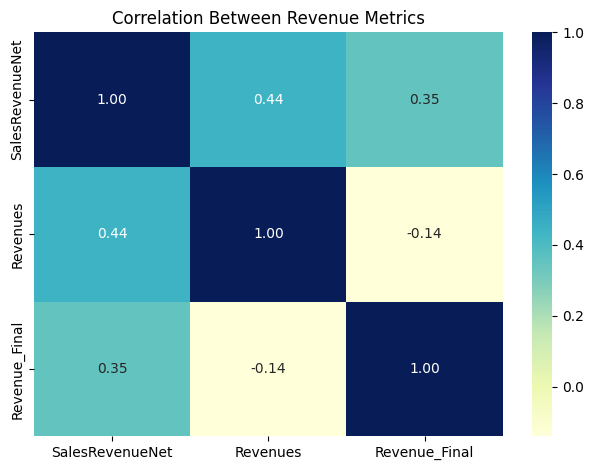

In [41]:
corr_matrix = merged_df[['SalesRevenueNet', 'Revenues', 'Revenue_Final']].corr()
print("🔗 Correlation Matrix:")
display(corr_matrix)

sns.heatmap(corr_matrix, annot=True, cmap="YlGnBu", fmt=".2f")
plt.title("Correlation Between Revenue Metrics")
plt.tight_layout()
plt.show()

In [42]:
# --- Rescale Revenue_Final to same units as original SEC data ---
merged_df['Revenue_Final_Adjusted'] = merged_df['Revenue_Final'] * 1_000_000

# Verify again
check = merged_df[['SalesRevenueNet', 'Revenues', 'Revenue_Final_Adjusted']].describe().T
check['range'] = check['max'] - check['min']
display(check[['mean', 'std', 'min', 'max', 'range']])

,mean,std,min,max,range
SalesRevenueNet,7.232443e+10,5.721631e+10,7.464000e+09,2.156390e+11,2.081750e+11
Revenues,7.894089e+10,5.303945e+10,4.540800e+10,2.156390e+11,1.702310e+11
Revenue_Final_Adjusted,8.551813e+10,6.402473e+10,7.464000e+09,2.745150e+11,2.670510e+11


In [43]:
priority_order = [
    "SalesRevenueNet",  # main
    "RevenueFromContractWithCustomerExcludingAssessedTax",  # fallback (post-2018)
    "Revenues"  # legacy fallback
]

df['Revenue_Final_Clean'] = df[priority_order].bfill(axis=1).iloc[:, 0]

In [44]:
df[['SalesRevenueNet','RevenueFromContractWithCustomerExcludingAssessedTax','Revenues','Revenue_Final_Clean']].tail(10)

,SalesRevenueNet,RevenueFromContractWithCustomerExcludingAssessedTax,Revenues,Revenue_Final_Clean
60,NaN,94836.0,NaN,94836.0
61,NaN,81797.0,NaN,81797.0
62,NaN,383285.0,NaN,383285.0
63,NaN,119575.0,NaN,119575.0
64,NaN,90753.0,NaN,90753.0
65,NaN,85777.0,NaN,85777.0
66,NaN,391035.0,NaN,391035.0
67,NaN,124300.0,NaN,124300.0
68,NaN,95359.0,NaN,95359.0
69,NaN,94036.0,NaN,94036.0


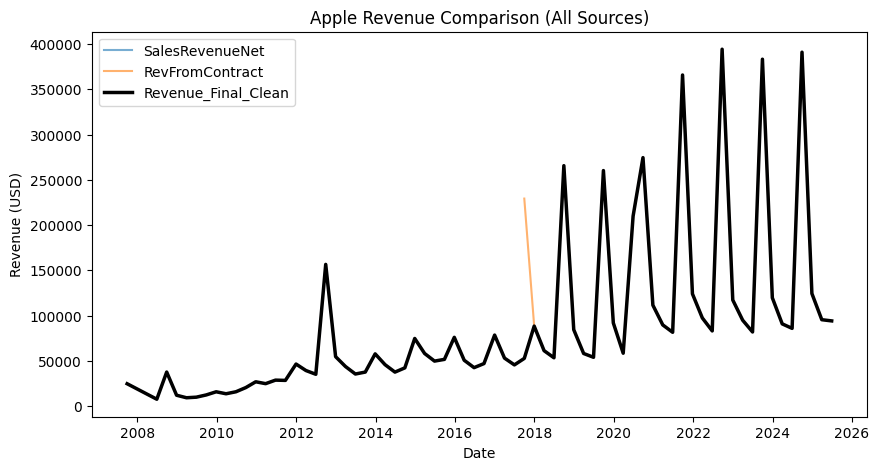

In [45]:
import matplotlib.pyplot as plt

# Sort by date
df = df.sort_values("end")

# Plot all revenue versions for comparison
plt.figure(figsize=(10,5))
plt.plot(df["end"], df["SalesRevenueNet"], label="SalesRevenueNet", alpha=0.6)
plt.plot(df["end"], df["RevenueFromContractWithCustomerExcludingAssessedTax"], label="RevFromContract", alpha=0.6)
plt.plot(df["end"], df["Revenue_Final_Clean"], label="Revenue_Final_Clean", linewidth=2.5, color='black')
plt.title("Apple Revenue Comparison (All Sources)")
plt.xlabel("Date")
plt.ylabel("Revenue (USD)")
plt.legend()
plt.show()

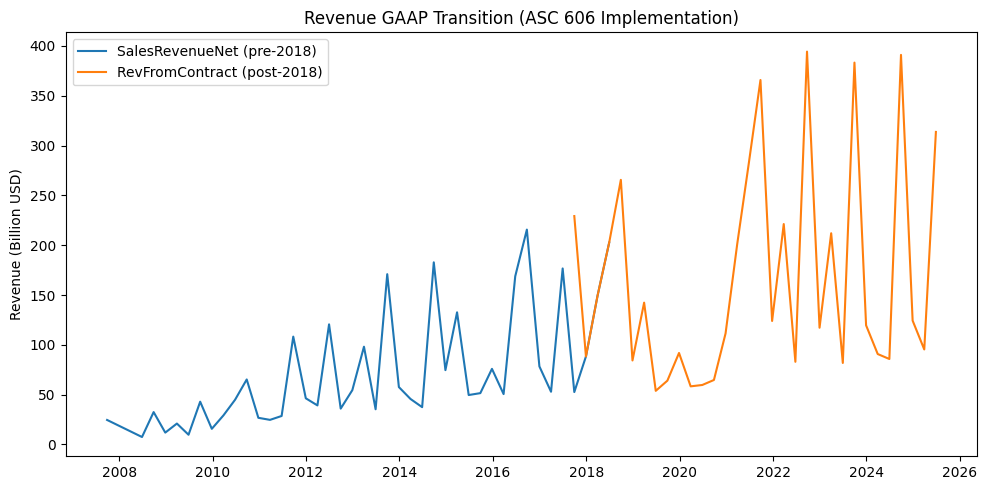

In [46]:
plt.figure(figsize=(10,5))
plt.plot(merged_df['end'], merged_df['SalesRevenueNet']/1e9, label="SalesRevenueNet (pre-2018)")
plt.plot(merged_df['end'], merged_df['RevenueFromContractWithCustomerExcludingAssessedTax']/1e9, label="RevFromContract (post-2018)")
plt.legend()
plt.title("Revenue GAAP Transition (ASC 606 Implementation)")
plt.ylabel("Revenue (Billion USD)")
plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt